In [138]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import logging
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
combine = train.append(test,ignore_index=True,sort=True)

In [148]:
combine[:5]

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [5]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [6]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [8]:
#Remove word with length less than 3
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [9]:
tokenized_tweet = []

from nltk import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: [ps.stem(i) for i in x.split()])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [10]:
#Combine tokens and make sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


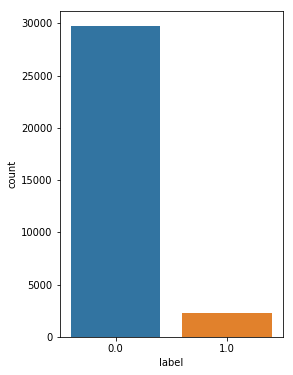

In [199]:
from seaborn import countplot
plt.figure(figsize=(4,6))
countplot(combine['label'])

In [ ]:
#***************************************
#***************************************
#***************************************
# IMPOERTANT.  Our Data is not belanced so we use F1_Score istead of Accurracy *******
#***************************************
#***************************************
#***************************************

In [155]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [156]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

In [157]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


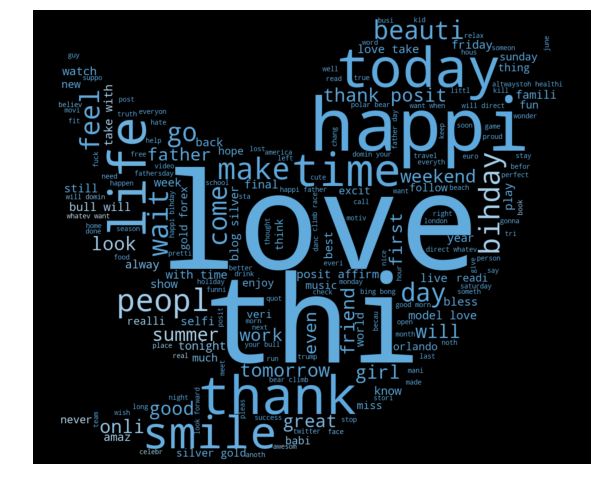

In [158]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

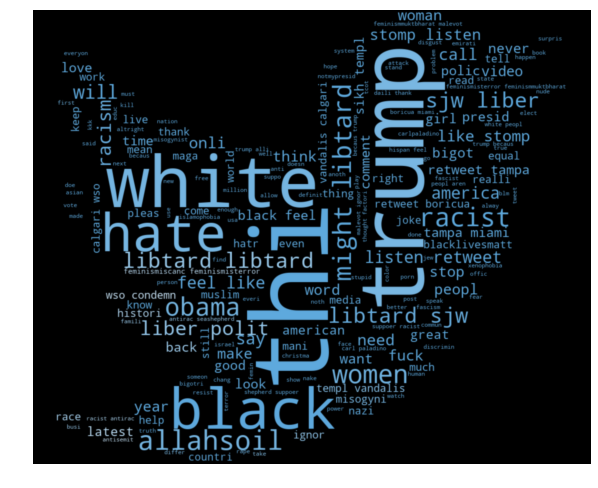

In [159]:
#Generating WordCloud for tweets with label ‘1‘.

all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [181]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [182]:
#Check hasg tag value for positive comments
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])


In [162]:
#Check hasg tag value for negative comments

ht_positive_unnest = sum(ht_positive,[])
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])
ht_negative_unnest = sum(ht_negative,[])

In [164]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [165]:
word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [166]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),
                            'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


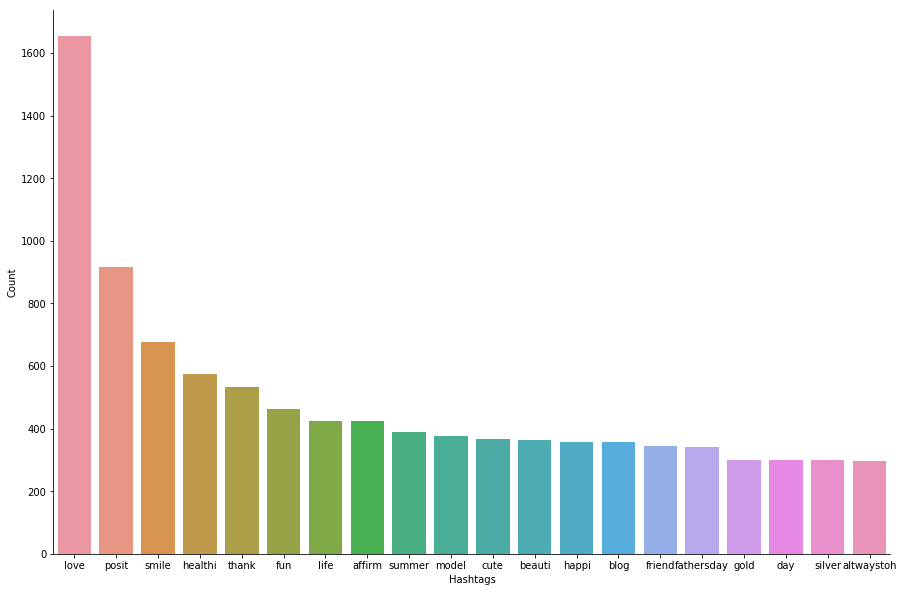

In [167]:
plt.figure(figsize=(15,10))
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,x='Hashtags',y='Count')
sns.despine()

In [168]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative_plot = df_negative.nlargest(20,columns='Count')


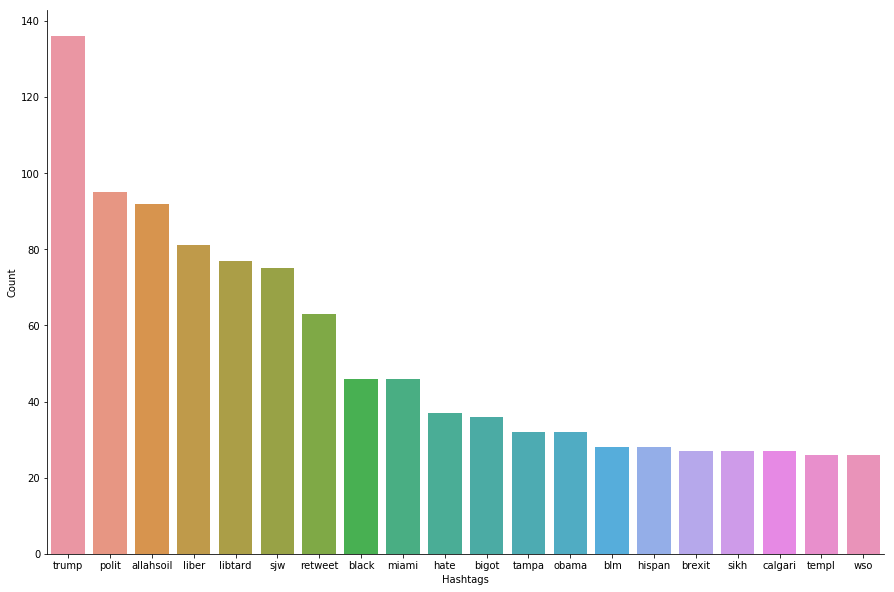

In [169]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_negative_plot,x='Hashtags',y='Count')
sns.despine()

In [170]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())


In [172]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

In [188]:
model_results=[]

In [181]:
train_bow = bow[:31962]
train_tfidf_matrix = tfidf_matrix[:31962]

In [122]:
from sklearn.model_selection import train_test_split

In [176]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [177]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [20]:
from sklearn.metrics import f1_score,accuracy_score

In [92]:
#Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=42,solver='lbfgs')
Log_Reg.fit(x_train_bow,y_train_bow)
prediction_bow = Log_Reg.predict(x_valid_bow)


In [183]:
prediction_bow

array([0, 0, 0, ..., 0, 0, 0])

In [186]:
f1_score(y_valid_bow, prediction_bow)

0.5014925373134328

In [189]:
model_results.append({'model':'LogisticRegression_Bow','f1_score':f1_score(y_valid_bow, prediction_bow)})

In [191]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=42,solver='lbfgs')
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = Log_Reg.predict(x_valid_tfidf)

In [196]:
f1score=f1_score(y_valid_tfidf, prediction_tfidf)

In [198]:
model_results.append({'model':'LogisticRegression_Tfidf','f1_score':f1score})

In [205]:
#XGBoost

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
Rand_Bow=RandomForestClassifier(n_estimators=100, random_state=0)
Rand_Bow.fit(x_train_bow,y_train_bow)
prediction_bow = Rand_Bow.predict(x_valid_bow)
prediction_bow

array([0, 0, 0, ..., 1, 0, 0])

In [225]:
f1score=f1_score(y_valid_bow, prediction_bow)

In [226]:
model_results.append({'model':'RandomForestClassifier_Bow','f1_score':f1score})

In [230]:
Rand_tfidf=RandomForestClassifier(n_estimators=100, random_state=0)
Rand_tfidf.fit(x_train_tfidf,y_train_tfidf)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [233]:
prediction_tfidf = Rand_tfidf.predict(x_valid_tfidf)
f1score=f1_score(y_valid_tfidf, prediction_tfidf)
model_results.append({'model':'RandomForestClassifier_tfidf','f1_score':f1score})

In [237]:
model_results

[{'model': 'LogisticRegression_Bow', 'f1_score': 0.5014925373134328},
 {'model': 'LogisticRegression_Tfidf', 'f1_score': 0.4816414686825054},
 {'model': 'RandomForestClassifier_Bow', 'f1_score': 0.5720858895705522},
 {'model': 'RandomForestClassifier_tfidf', 'f1_score': 0.5931283905967452}]

In [240]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [241]:
mulNB_bow=MultinomialNB()
mulNB_bow.fit(x_train_bow,y_train_bow)
prediction_bow = mulNB_bow.predict(x_valid_bow)
f1score=f1_score(y_valid_bow, prediction_bow)
model_results.append({'model':'MultinomialNB_Bow','f1_score':f1score})


In [243]:
mulNB_tfidf=MultinomialNB()
mulNB_tfidf.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = mulNB_bow.predict(x_valid_tfidf)
f1score=f1_score(y_valid_tfidf, prediction_tfidf)
model_results.append({'model':'MultinomialNB_tfidf','f1_score':f1score})

In [16]:
model_results

[{'model': 'LogisticRegression_Bow', 'f1_score': 0.5014925373134328},
 {'model': 'LogisticRegression_Tfidf', 'f1_score': 0.4816414686825054},
 {'model': 'RandomForestClassifier_Bow', 'f1_score': 0.5720858895705522},
 {'model': 'RandomForestClassifier_tfidf', 'f1_score': 0.5931283905967452},
 {'model': 'MultinomialNB_Bow', 'f1_score': 0.552710843373494},
 {'model': 'MultinomialNB_tfidf', 'f1_score': 0.4821621621621622}]

In [245]:
#Deep Network

In [104]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

corpus=combine['Tidy_Tweets'][:31962]
total_tags=31962

train_size = int(total_tags * .7)

train_posts = corpus[:train_size]
train_tags = train['label'][:train_size]

test_posts = corpus[train_size:]
test_tags = train['label'][train_size:]

y_test_class=test_tags


In [105]:
max_words = 2500

tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(corpus) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [106]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)


In [107]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [108]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

batch_size = 32
epochs = 4

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 20135 samples, validate on 2238 samples
Epoch 1/4
20135/20135 [==============================] - 27s 1ms/step - loss: 0.1864 - accuracy: 0.9424 - val_loss: 0.1599 - val_accuracy: 0.9428
Epoch 2/4
20135/20135 [==============================] - 26s 1ms/step - loss: 0.1007 - accuracy: 0.9674 - val_loss: 0.1627 - val_accuracy: 0.9504
Epoch 3/4
20135/20135 [==============================] - 26s 1ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 0.1925 - val_accuracy: 0.9491
Epoch 4/4
20135/20135 [==============================] - 28s 1ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.2332 - val_accuracy: 0.9508


In [109]:
Y_pred=model.predict(x_test)

In [111]:
f1score=f1_score(y_test_class, [y.argmax() for y in Y_pred])
model_results.append({'model':'Deep_network','f1_score':f1score})

In [112]:
f1score

0.652482269503546

In [113]:
model_results

[{'model': 'LogisticRegression_Bow', 'f1_score': 0.5014925373134328},
 {'model': 'LogisticRegression_Tfidf', 'f1_score': 0.4816414686825054},
 {'model': 'RandomForestClassifier_Bow', 'f1_score': 0.5720858895705522},
 {'model': 'RandomForestClassifier_tfidf', 'f1_score': 0.5931283905967452},
 {'model': 'MultinomialNB_Bow', 'f1_score': 0.552710843373494},
 {'model': 'MultinomialNB_tfidf', 'f1_score': 0.4821621621621622},
 {'model': 'Deep_network', 'f1_score': 0.652482269503546}]

In [160]:
#Using Word2Vec
#Convert each word of sentence into vector and take avg 

from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [200]:
sentences=[]
for i in range(len(corpus)):
    sentences.append([word for word in combine['Tidy_Tweets'][i].split(' ') if word not in stopwords.words('english')])

In [201]:
max([len(word) for word in sentences])

17

In [202]:
# Training the Word2Vec model
import gensim
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1)

In [203]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(model.wv.vectors_norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [204]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in sent.split():
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    

In [205]:
x_train, x_test, y_train, y_test  = train_test_split(combine['Tidy_Tweets'][:31962],train['label'], test_size=0.3, random_state = 42)

In [206]:
test_tokenized = [w2v_tokenize_text(sent) for sent in x_test]
train_tokenized = [w2v_tokenize_text(sent) for sent in x_train]

In [188]:
len(train_tokenized)

22373

In [207]:
model.init_sims()
X_train_word_average = word_averaging_list(model.wv,train_tokenized)
X_test_word_average = word_averaging_list(model.wv,test_tokenized)

In [190]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, y_train)


/Users/pankaj/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [191]:
y_pred = logreg.predict(X_test_word_average)

In [192]:
f1score=f1_score(y_test, y_pred)
# model_results.append({'model':'Word2Vec_Word_Avg','f1_score':f1score})

In [194]:
from sklearn.

0.10256410256410256

In [ ]:
### Conclusion Best model is
#***********Deep_network*************

##Now we can perform Hyper Paratmer tunning and Cross Validation for futher tunning